# Economic Connectedness
---

The analysis of Economic Connectedness is the first assignment of the course Analytics Practicum I (Python).
The course is part of the curriculum of the MSc in Business Analytics program of the Department of Management Science and Technology of the Athens University of Economics and Business.

The current assignment has been inspired by two studies, that they have appeared in the journal Nature, carried out on social capital. The two studies are presented below:

* [Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital I: measurement and associations with economic mobility. Nature 608, 108–121 (2022)](https://doi.org/10.1038/s41586-022-04996-4).

* [Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital II: determinants of economic connectedness. Nature 608, 122–134 (2022)](https://doi.org/10.1038/s41586-022-04997-3).

The data needed, in order to make this analysis, are obtained from the two following sources:
* [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas).

* [Opportunity Insights](https://opportunityinsights.org/data/).

While the current analysis will be done on [Jupyter Notebook](http://jupyter.org/) and in [Python 3.10.0](https://www.python.org/downloads/release/python-3100/).

---

> Dimitrios Matsanganis <br />
> Academic ID: f2822212 <br />
> MSc Business Analytics 2022-2023 FT <br />
> Athens University of Economics and Business <br />
> dmatsanganis@gmail.com, dim.matsanganis@aueb.gr

---

---
## Preparatory Steps: Importation of the necessary Python libraries
---

The initial preparatory step of this assignment is the importation of the Python libraries that will be used in the following questions of the assignments.
These libraries are presented below:

* [pandas](https://pandas.pydata.org/docs/)
* [numpy](https://numpy.org/)
* [os](https://docs.python.org/3/library/os.html)
* [json](https://docs.python.org/3/library/json.html)
* [seaborn](http://seaborn.pydata.org/)
* [matplotlib](https://matplotlib.org/)
* [plotly](https://plotly.com/python/plotly-express/)
* [plotnine](https://pypi.org/project/plotnine/)
* [urllib](https://docs.python.org/3/library/urllib.html)


**Note!**
The aforementioned libraries, in order to function correctly, must be installed in Python **locally before being imported**.


In [2]:
import pandas as pd  # Import Pandas library.
import numpy as np   # Import Numpy library (most probably will be already included, but to be sure).
import urllib        # Import urllib to use urlopen to get the geojson map file.

import matplotlib.pyplot as plt     # Import matplotlib, for plotting.
import seaborn as sns               # Import seaborn, for plotting.
import plotly.express as px         # Import plotly.express for the Q1 plot (US map).
import plotnine                     # Import plotnine for Q4 ggpllot.   
    
import os    # Import os library, in order to parse files.
import json  # Import json to load the json files (needed for Q1).

import warnings
warnings.filterwarnings('ignore') # Ignore the warnings regarding future updates - deprecations.

---
## Preparatory Steps: Obtain the data for the first and second questions (Q1 & Q2)
---

As mentioned earlier the data origin from these two studies [Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital I: measurement and associations with economic mobility. Nature 608, 108–121 (2022)](https://doi.org/10.1038/s41586-022-04996-4) and [Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital II: determinants of economic connectedness. Nature 608, 122–134 (2022)](https://doi.org/10.1038/s41586-022-04997-3) and can be downloaded from the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas) website.
The downloaded data from **Social Capital Atlas** provide measures of Social Capital for counties, ZIP codes, high schools, and colleges in the United States based on data from [Facebook (Meta)](https://about.meta.com/).

The three constructed measures of social capital are the following:
1. Connectedness - The extent to which people with different characteristics are friends with each other. This includes the main economic connectedness measure.


2. Cohesiveness - The degree to which friendship networks are clustered into cliques and whether friendships tend to be supported by mutual friends. This includes the clustering and support ratio measures.


3. Civic Engagement - Indices of trust or participation in civic organizations. This includes the volunteering rate measure.

Initially, we are going to use only the dataset of `social_capital_county.csv` (can be found through the above-mentioned links, *or* locally in the `data` folder and `data/social_capital_county.csv` - [here](data/social_capital_county.csv)).
This dataset contains information regarding the social capital for the county level and will be used to create our dataframe `df_county`.

In the created dataframe, we will only keep the necessary - for our analysis and for optimization purposes - columns.
More specifically, we are going to include in our dataframe the columns: `county`, `county_name`, `pop2018`, and `ec_county` *(`pop2018` is not needed for Q1, only for Q2)*.

If we want briefly to describe what each column represents (*through the study's documentation*), we can say the following:
  - `county`:  5-digit county FIPS code.
  - `county_name`: name of the county and state.
  - `pop2018`: the US Population in 2018.
  - `ec_county`: baseline definition of economic connectedness: two times the share of high-SES friends among low-SES individuals, averaged over all low-SES individuals in the county.

More details regarding the data can be found in the study's [documentation](data\papers\data_release_readme_31_07_2022_nomatrix.pdf) and more precisely in the Codebook section *(2 Codebook/2.1 County-Level Data, on page 3)*.

Finally and before moving forward to our analysis, we need to cite the two above-mentioned studies:

- *Chetty, Raj, Matthew O. Jackson, Theresa Kuchler, Johannes Stroebel, Nathaniel Hendren, Robert Fluegge, Sara Gong, Federico Gonzalez, Armelle Grondin, Matthew Jacob, Drew Johnston, Martin Koenen, Eduardo Laguna-Muggenberg, Florian Mudekereza, Tom Rutter, Nicolaj Thor, Wilbur Townsend, Ruby Zhang, Mike Bailey, Pablo Barber ́a, Monica Bhole, and Nils Wernerfelt (2022a). “Social Capital I: Measurement and Associations with Economic Mobility.” Nature 608 (7921): 108-121, 2022.*


- *Chetty, Raj, Matthew O. Jackson, Theresa Kuchler, Johannes Stroebel, Nathaniel Hendren, Robert Fluegge, Sara Gong, Federico Gonzalez, Armelle Grondin, Matthew Jacob, Drew Johnston, Martin Koenen, Eduardo Laguna-Muggenberg, Florian Mudekereza, Tom Rutter, Nicolaj Thor, Wilbur Townsend, Ruby Zhang, Mike Bailey, Pablo Barber ́a, Monica Bhole, and Nils Wernerfelt (2022b). “Social Capital II: Determinants of Economic Connectedness.” Nature 608 (7921): 122-134, 2022.*

In [4]:
# Get the csv file through the path and the os library.
path = os.path.abspath("data/social_capital_county.csv")

# Create our baseline dataframe for the Q1 and Q2.
df_county = pd.read_csv(path, usecols=["county", "county_name", "pop2018", "ec_county"])

# Preview the dataframe - 10 first rows.
# df_county.head(10)

# Preview the dataframe - 10 random rows.
df_county.sample(10)

,county,county_name,pop2018,ec_county
1475,28161,"Yalobusha, Mississippi",12421.0,0.63774
2735,48491,"Williamson, Texas",527057.0,0.99893
1207,24041,"Talbot, Maryland",37211.0,0.85333
1113,22011,"Beauregard, Louisiana",36769.0,0.82858
1907,37079,"Greene, North Carolina",21008.0,0.50579
1352,27087,"Mahnomen, Minnesota",5506.0,0.58665
223,6077,"San Joaquin, California",732212.0,0.72867
2954,54031,"Hardy, West Virginia",13842.0,0.78469
2064,39091,"Logan, Ohio",45307.0,0.83480
617,17055,"Franklin, Illinois",39127.0,0.71329


---
## Question 1: The Geography of Social Capital in the United States

---
* In order to not interfere through the following transformation with the baseline dataframe `df_county`, we will create a copy of it.

* This way, we can work separately for each question and maintain the baseline dataframe unaffected by the performed transformations.

* Thus, we create the `question1_df` dataframe for the Q1 and we remove the `pop2018` column, since it is not needed for the current question.

In [5]:
# Make a copy with predetermined columns of the baseline dataframe.
question1_df = df_county[["county", "county_name", "ec_county"]].copy()

# Preview the dataframe - 10 random rows.
question1_df.sample(10)

,county,county_name,ec_county
663,17147,"Piatt, Illinois",1.01722
325,12017,"Citrus, Florida",0.69256
2749,49011,"Davis, Utah",1.13732
1626,30073,"Pondera, Montana",0.83607
2644,48303,"Lubbock, Texas",0.76856
1388,27159,"Wadena, Minnesota",1.04469
956,20147,"Phillips, Kansas",1.03273
2494,47181,"Wayne, Tennessee",0.68234
1318,27019,"Carver, Minnesota",1.21801
2506,48015,"Austin, Texas",0.82190


* From the above output, we can observe that not all the observations (rows) have a 5-digit county FIPS code.

* The obvious explanation for this fact is that when the first digit of a county FIPS code is 0, it is ignored/deleted (most probably the CSV editor used automatically done so - e.g. MS Excel does it by default).

* To further clarify that we execute the following command:

In [6]:
# Since the dataframe is sorted by the county FIPS code, by selecting the
# first 10 and last 10 observations we can clarify the aforementioned.
test_df = question1_df.county.head(10)
test_df = test_df.append(question1_df.county.tail(10))

# Print the results (20 rows: 10 first rows and 10 last rows).
print(test_df)

0        1001
1        1003
2        1005
3        1007
4        1009
5        1011
6        1013
7        1015
8        1017
9        1019
3079    56027
3080    56029
3081    56031
3082    56033
3083    56035
3084    56037
3085    56039
3086    56041
3087    56043
3088    56045
Name: county, dtype: int64


* After the confirmation of our assumption, we need to fill the leading 0 to the 4-digit county FIPS code, in order to all entries of county column, being 5-digit ones.

In [7]:
# We can do so through a lambda expression:
question1_df['county']= question1_df['county'].apply(lambda x: '{0:0>5}'.format(x))

# We print the results the way we did earlier, to compare the results and confirm our transformation has been applied.
test_df = question1_df.county.head(10)
test_df = test_df.append(question1_df.county.tail(10))

# Print the results (20 rows: 10 first rows and 10 last rows).
print(test_df)

0       01001
1       01003
2       01005
3       01007
4       01009
5       01011
6       01013
7       01015
8       01017
9       01019
3079    56027
3080    56029
3081    56031
3082    56033
3083    56035
3084    56037
3085    56039
3086    56041
3087    56043
3088    56045
Name: county, dtype: object


* As we can notice, the 4-digit county FIPS codes, have been transformed to 5-digit ones.
* However, we need to point out the fact that since we used a specified format through a lambda expression, the type of the column has changed from int64 to object (referred to C types).
* We decide to leave it as it is for the time being and to return and make additional adjustments if needed.


* Since we take care of this issue, we can move forward and check for possible missing values.
* We will check for missing values on all three columns, but we are mainly interesting on the `ec_county` column, since we inspect that there will be missing values.
* We inspect the above from the demanded figure, where a 'NA', exists on the right legend.

In [8]:
# county column.
if question1_df.county.isnull().sum() == 0:
    print("No missing values exist in county column!")
else:
    print("Missing values exist in county_name column! Missing values: ", question1_df.county_name.isnull().sum())

# county_name column.
if question1_df.county_name.isnull().sum() == 0:
    print("No missing values exist in county_name column!")
else:
    print("Missing values exist in county_name column! Missing values: ", question1_df.county_name.isnull().sum())

# ec_county column.
if question1_df.ec_county.isnull().sum() == 0:
    print("No missing values exist in ec_county column!")
else:
    print("Missing values exist in ec_county column! Missing values: ", question1_df.ec_county.isnull().sum())

No missing values exist in county column!
No missing values exist in county_name column!
Missing values exist in ec_county column! Missing values:  71


* Our assumption has been confirmed!
* Thus, there are **71 missing values on the ec_county column**, while there are no missing values on the other two columns of the `question1_df` dataframe.


* Following the assumption's confirmation, there are 71 counties that we do not know their Economic Connectedness.
* Therefore, we should handle these data in a way that will not impact the coloring of the US map process *(missing data handling)*.


* Through the definition of the Economic Connectedness *(can be found at the [dataset's documentation](data\papers\data_release_readme_31_07_2022_nomatrix.pdf))* by default, the `ec_county` cannot be a negative number.
* For further confirmation purposes we can output the minimum and the maximum `ec_county` values.

In [9]:
# In order to validate the documentation regarding the ec_county
# and that there are no violations (negative values).
# That's why we output the min and max values.
print("The maximum value is: ", question1_df.ec_county.max())
print("The minimum value is: ", question1_df.ec_county.min())

The maximum value is:  1.3597
The minimum value is:  0.29469001


* From the above outputs, we found out that the minimum value is **0.29469001** and the maximum value is **1.3597** (the range of `ec_county`).
* Therefore, the aforementioned assumption is **not** violated.


* Thus, we can implement a common method of handling the missing values, that is to set all the missing values with a - negative - value that does not exist as a value on the column.

* This way we could easily output the NAs value on the final map.


* To summarize the above, we choose to replace all missing values with a negative value *(with no particular reason we select the `missing values = -1`)*.

In [10]:
# We will replace all NAs of the ec_county column through fillna.
question1_df.ec_county = question1_df.ec_county.fillna(-1)

* Now, we will check that we have successfully changed the dataframe.


* To do so we will output the new minimum value of the dataframe *- which we expect to be `-1` -* and we will count the `-1` entries *- which we expect them to be `71`*.

In [11]:
# Print the new minimum value - we want to be -1.
print("The minimum value is: ", question1_df.ec_county.min())

# Print the count of the -1 on the ec_county column - we want them to be 71.
print("The -1 on the ec_county column are: ", question1_df[question1_df.ec_county == -1].shape[0])

The minimum value is:  -1.0
The -1 on the ec_county column are:  71


* After we confirm that our change has been successfully implemented.
We can move on and init the creation process of our map.


* The first thing we should do is to create the bins - categories, that all the `the ec_county` elements will be assigned to one bin.


* We took advantage from the fact that the NAs values are equal to `-1` and we created the bins through that - the `NA` will be returned for the values that belong to the range (-2,0].

In [12]:
# Create 11 bins to depicted the demanded figure.
bins = [-2, 0, 0.58, 0.67, 0.72, 0.76, 0.81, 0.85, 0.90, 0.97, 1.06, 1.3597]

labels = ["NA", "< 0.58", "0.58 - 0.67", "0.67 - 0.72", "0.72 - 0.76", 
          "0.76 - 0.81", "0.81 - 0.85", "0.85 - 0.90", "0.90 - 0.97", "0.97 - 1.06", "> 1.06"]

question1_df["bins_categories"] = pd.cut(question1_df["ec_county"], bins=bins, labels=labels)

# Output the results for evaluation purposes.
print (question1_df)

     county          county_name  ec_county bins_categories
0     01001     Autauga, Alabama    0.72077     0.72 - 0.76
1     01003     Baldwin, Alabama    0.74313     0.72 - 0.76
2     01005     Barbour, Alabama    0.41366          < 0.58
3     01007        Bibb, Alabama    0.63152     0.58 - 0.67
4     01009      Blount, Alabama    0.72562     0.72 - 0.76
...     ...                  ...        ...             ...
3084  56037  Sweetwater, Wyoming    0.96235     0.90 - 0.97
3085  56039       Teton, Wyoming    1.07623          > 1.06
3086  56041       Uinta, Wyoming    0.95452     0.90 - 0.97
3087  56043    Washakie, Wyoming    0.90667     0.90 - 0.97
3088  56045      Weston, Wyoming    0.97840     0.97 - 1.06

[3089 rows x 4 columns]


* Now we can see that a new column has been added to our dataframe.
* This new column contains the information regarding which bin the `ec_county` belongs to. 
* This way we can categorize the counties and colorize them properly.


* Moving forward to the creation of the USA map, we will use the [plotly](https://plotly.com/python/). 
* More specifically, we will create a [plotly's choropleth map](https://plotly.com/python/choropleth-maps/), which will filled through a JSON file.
* This JSON file contains data regarding the US counties and their geographic coordinates - that's why it is refereed as GeoJSON file. 
* The file can be obtained through the [plotly's GitHub public repository](https://github.com/plotly/datasets/blob/master/geojson-counties-fips.json) (or alternative through [here](https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json)).


* Therefore, the initial step before start filling the map is to load the necessary JSON file.   
* We could parse the GeoJSON file to a variable through the online url, but since we do not own the repository, we cannot be sure that there will not be any possible changes or alterations or even a permanent deletion of the public repository.
* For the previous reason combined with the advice given at the lectures to download locally the files that we use - especially the ones related with the data, we decide to download and use the local GeoJSON file.
* This way we will also have stable data - in case a change occurs (e.g. a change of a county FIPS code or coordinates etc.).

In [13]:
# Alternative way - online way.
# Parse the online url to the json file.
# from urllib.request import urlopen
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
# counties = json.load(response)

# Load the cloned and locally stored json file, in case of a change, an alternation or a deletion to the online one.
# We move forward with the local one since it is suggested through the lectures and in order to have stable data 
# (e.g. possibility of a change of a FIPS code).
jsonfileloc = open('data/geojson-counties-fips.json')
counties = json.load(jsonfileloc)

* After load the GeoJSON file (with either way that can be done), we are ready to create our replication of the demanded USA map through the plotly library.


* To do so, we parse the whole dataframe and the GeoJSON file (variable `counties`) to the plotly's cloropleth function, in order to create and fill the map.
* For starters, we color the 11 bins with the right color (a very close approach to the given one).


* We found the color through the [Adobe Photoshop's eyedropper tool](https://www.adobe.com/gr_en/products/photoshop.html) and a screenshot of the demanded figure. 
* Otherwise, we could use the color palette `RdBu` and specify manually only the `NAs` bin color. 
* However, we though that the manual assignment of bins to discrere colors will give us a better output, since we will assign each bin to the exact color, while with the color palette we could be sure that is the exact depicted one.

In [ ]:
fig = px.choropleth(question1_df, 
                    geojson=counties, 
                    locations='county',
                    color="bins_categories",
                    
                    # Color each category/bin through a distinct color - better choice 
                    # since we could not find the exact color palette.
                    color_discrete_map=
                    { 
                              '< 0.58': '#b2182b',
                        '0.58 - 0.67' : '#d6604d',
                        '0.67 - 0.72' : '#f4a582',
                        '0.72 - 0.76' : '#fddbc7',
                        '0.76 - 0.81' : '#f7f7f7',
                        '0.81 - 0.85' : '#d1e5f0',
                        '0.85 - 0.90' : '#92c5de',
                        '0.90 - 0.97' : '#4393c3',
                        '0.97 - 1.06' : '#2166ac',
                             '> 1.06' : '#053061',
                                 'NA' : '#ffd700'
                    },
                    
                    # order the categories.
                    category_orders=
                    {
                        'bins_categories' : 
                        [
                            '> 1.06',
                            '0.97 - 1.06',
                            '0.90 - 0.97',
                            '0.85 - 0.90',
                            '0.81 - 0.85',
                            '0.76 - 0.81',
                            '0.72 - 0.76',
                            '0.67 - 0.72',
                            '0.58 - 0.67',
                            '< 0.58',
                            'NA',
                        ]
                    },
                    
                    # Create the hover data to replicate the demanded ones 
                    # (also round the ec_county to two decimals and replace '-1' with NAs).
                    hover_name='county_name',
                    hover_data=
                    {
                        'county' : True,
                        'economic connectedness' : question1_df['ec_county'].round(decimals = 2).replace(-1,'NA'),
                        'bins_categories' : False,
                    },
                    # Focus on USA.
                    scope="usa",
                    )

fig.update_layout(legend=dict(y=0.5))

# Update the legend's title and move it to the demanded location (right and middle).
fig.update_layout(legend_title="Economic Connectedness")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, legend=dict(
    yanchor="middle",y=0.5,
    xanchor="right",
    x=1.5,
))

# Output the figure.
fig.show()

* After we compare our map with the demanded one, we saw that some counties remain uncolored, regardless the fact that the counties exist in our dataset.


* We can further clarify that, with the following command, regarding one county that remain uncolor in our previous map but exists in our dataset. 
* One of those counties is *Wade Hampton, Alaska*.

In [14]:
question1_df[question1_df['county_name'] == 'Wade Hampton, Alaska']

,county,county_name,ec_county,bins_categories
81,02158,"Wade Hampton, Alaska",0.64176,0.58 - 0.67


* From the above, we are sure that the non-colorization of some counties issue is not due to missing data of our dataset. 
* Therefore, we sound focus on the GeoJSON file. 


* Our initial thoughts was that there will be an update or a differentiation between the JSON file we download locally and the one used for the creation of the figure that we need to replicate.
* These cases are handled by the plotly as missing data cases!
* **Then, we found out that this is not exactly the case.**

---
**Important finding**
* We initially search for the county FIPS code of `Wade Hampton, Alaska - 02158` in the GeoJSON file and we cannot found anything that matches it.
* However, after looking more carefully the GeoJSON file, we found out that the 'Wade Hampton, Alaska' exists in the GeoJSON file with a different FIPS code *(`02270`)*.


* In addition, when we search it further found out that the `Wade Hampton, Alaska` county FIPS code has been changed from **02158 --> 02270** in 2014. 
* To clarify this we quote our findinds from [CDC - US County Geography documentation - page 3](https://www.cdc.gov/nchs/data/data_acces_files/County-Geography.pdf):
   
   *" Wade-Hampton Census Area AK (FIPS code = 02270). Wade-Hampton Census Area, AK
(02270 was renamed Kusilvak, AK and assigned a new FIPS code (02158) effective in 2014".*


* The renamed of the county and the assign of a new FIPS code is also validated [here](https://alaskapublic.org/2015/07/03/governor-walker-renames-wade-hampton-census-area/) and [Wikipedia - here](https://en.wikipedia.org/wiki/Kusilvak_Census_Area,_Alaska).


* However, we also observe a difference regarding the coloring of this - among other - counties that are not exist properly in the GeoJSON file (regarding the other occurencies there are not exist data in our dataframe **in comparison with the  `Wade Hampton, Alaska` case** - and we will point it out later in the report) between the study's [figure](https://www.nature.com/articles/s41586-022-04996-4/figures/2) and the demanded [figure](data\demanded_figures\economic_connectedness_zip.html) regarding the `Wade Hampton, Alaska` coloring. In the first one it is colored with its `ec_county` value that belongs to the '0.58 - 0.67' bin and colored accordingly, but in the second figure - which is the one we are asked to replicate - it is colored as a `NA` value. 


* We assume that this implementation method was selected either to make our replication work easier or the `Wade Hampton, Alaska` case was not detected and was generalized by the other uncolored counties which does not exist in our dataframe, since it wrong to replace a finding value with a NA - while the value is valid.


* To be more precise, we were (un)lucky when we choose `Wade Hampton, Alaska`, since we were misleaded to though that all counties that are depicted without a color follow this trend and has a `ec_county` value.


* This is not the case, since as we can see below, the `Terrell, Texas` county *(which also remain uncolored)* **does not exist completly in our dataframe**
---

In [15]:
question1_df[question1_df['county_name'] == 'Terrell, Texas']

,county,county_name,ec_county,bins_categories


* Therefore, we choose to move morward and replicate the demanded figure as much as we can, and replace all the uncolored counties `ec_county` values with `NA`, including the `Wade Hampton, Alaska` case *(since the demanded figure colored it as NA, even if it has a ec_county value)*.


* For these reason, we should add these counties manually to the dataframe `question1_df`. 

* To do so, we will compare the variable that contains the JSON file's data (*var counties*) through an iterative procedure with the existing counties of the dataframe `question1_df` (*could not find a different way to do so, to avoid the for-loop statement*).

* Thus, we should assign them the NA's value (*= -1*), through an iterative procedure that will fill the other missing data of the dataframe `question1_df` from the GeoJSON file.


* This procedure is precented below:

In [19]:
# An iterative procedure that will fill 
# the missing data to the GeoJSON file.
for i in counties['features']:                                  
    if str(i['id']) not in question1_df['county'].tolist():
        question1_df = question1_df.append({'county':i['id'],
                                            'county_name':i['properties']['NAME'],
                                            'ec_county':-1}, # assigns them the NA value.
                                             ignore_index=True)

* Now we are able to repeat the procedures that took place earlier and create again our own USA map figure.
* We start form the bins creation.

In [20]:
# Recreate 11 bins to depicted the demanded figure.
bins = [-2, 0, 0.58, 0.67, 0.72, 0.76, 0.81, 0.85, 0.90, 0.97, 1.06, 1.3597]

labels = ["NA", "< 0.58", "0.58 - 0.67", "0.67 - 0.72", "0.72 - 0.76", 
          "0.76 - 0.81", "0.81 - 0.85", "0.85 - 0.90", "0.90 - 0.97", "0.97 - 1.06", "> 1.06"]

question1_df["bins_categories"] = pd.cut(question1_df["ec_county"], bins=bins, labels=labels)

# Output the results for evaluation purposes.
print (question1_df)

     county       county_name  ec_county bins_categories
0     01001  Autauga, Alabama    0.72077     0.72 - 0.76
1     01003  Baldwin, Alabama    0.74313     0.72 - 0.76
2     01005  Barbour, Alabama    0.41366          < 0.58
3     01007     Bibb, Alabama    0.63152     0.58 - 0.67
4     01009   Blount, Alabama    0.72562     0.72 - 0.76
...     ...               ...        ...             ...
3218  72003            Aguada   -1.00000              NA
3219  72009          Aibonito   -1.00000              NA
3220  72015            Arroyo   -1.00000              NA
3221  51570  Colonial Heights   -1.00000              NA
3222  51690      Martinsville   -1.00000              NA

[3223 rows x 4 columns]


* Now, we need to clarify that the changes took place as we want them to.
* For this reason, we expect to see a change regarding the `Wade Hampton, Alaska` (*the county that presented above - located at the bottom left corner of the map*) `ec_county` value from **0.64176** to **NA**.
* If we get those results, that means that our fill adjustments succeed and we can output a USA map with all the counties that exist in our dataframe and through the figure's standards that we need to replicate. 

In [ ]:
fig = px.choropleth(question1_df, 
                    geojson=counties, 
                    locations='county',
                    color="bins_categories",
                    
                    # Color each category/bin through a distinct color - better choice 
                    # since we could not find the exact color palette.
                    color_discrete_map=
                    { 
                              '< 0.58': '#b2182b',
                        '0.58 - 0.67' : '#d6604d',
                        '0.67 - 0.72' : '#f4a582',
                        '0.72 - 0.76' : '#fddbc7',
                        '0.76 - 0.81' : '#f7f7f7',
                        '0.81 - 0.85' : '#d1e5f0',
                        '0.85 - 0.90' : '#92c5de',
                        '0.90 - 0.97' : '#4393c3',
                        '0.97 - 1.06' : '#2166ac',
                             '> 1.06' : '#053061',
                                 'NA' : '#ffd700'
                    },
                    
                    # Order the categories.
                    category_orders=
                    {
                        'bins_categories' : 
                        [
                            '> 1.06',
                            '0.97 - 1.06',
                            '0.90 - 0.97',
                            '0.85 - 0.90',
                            '0.81 - 0.85',
                            '0.76 - 0.81',
                            '0.72 - 0.76',
                            '0.67 - 0.72',
                            '0.58 - 0.67',
                            '< 0.58',
                            'NA',
                        ]
                    },
                    
                    # Create the hover data to replicate the demanded ones 
                    # (also round the ec_county to two decimals and replace '-1' with NAs).
                    hover_name='county_name',
                    hover_data=
                    {
                        'county' : True,
                        'economic connectedness' : question1_df['ec_county'].round(decimals = 2).replace(-1,'NA'),
                        'bins_categories' : False,
                    },
                    # Focus on USA.
                    scope="usa",
                    )

fig.update_layout(legend=dict(y=0.5))

# Update the legend's title and move it to the demanded location (right and middle).
fig.update_layout(legend_title="Economic Connectedness")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, legend=dict(
    yanchor="middle",y=0.5,
    xanchor="right",
    x=1.5,
))

# Output the figure.
fig.show()

* As we can see our USA map looks exactly identical with the demanded [one](data\demanded_figures\economic_connectedness_zip.html) !
* ... and the `Wade Hampton, Alaska's ec_county` issue has been solved and has been colored as a `NA`, while also has an updated FIPS code provided by the GeoJSON entry *(02158 --> 02270)* !

---
## Question 2: Economic Connectedness and Outcomes
---

In this question, we are asked to replicate the [Figure 4 of the first paper](nature.com/articles/s41586-022-04996-4/figures/4). 
The demanded figure is a scatter plot of Upward Income Mobility against Economic Connectedness (EC) for the 200 most populous US counties *(the exact demanded figure can be found [here](data/demanded_figures/household_income_economic_connectedness.png))*. 

---
### Obtain the data for Question 2
---

In order to create this figure we need to obtain the necessary datasets to extract the data.
To do so, we visited the [Opportunity Atlas](https://www.nber.org/papers/w25147) website, where we accessed the [documentation](data/papers/w25147.pdf) file.

Through the documentation file we led to the datasets repository website *([here](https://opportunityinsights.org/data/))*, from where we download and store locally the `county_outcomes_simple.csv` *(you can find it [here](data/county_outcomes_simple.csv))*, which is the first data source for the current question. 

From the first dataset we will keep only the necessary columns, which are the presented briefly below: 
  - `state`: 2-digit state 2010 FIPS code.
  - `county`: 3-digit county 2010 FIPS code.
  - `kfr_pooled_pooled_p25`: Mean household income rank for children whose parents were at the 25th percentile of the 
national income distribution. Incomes for children were measured as mean earnings in 2014-2015  when they were between the ages 31-37. Household income is defined as the sum of own  and spouse’s income. Race is either **Pooled**, White, Black or Hispanic. Data on additional races can be found in full set of county level outcomes. Gender is one of **pooled**, male or female. In our case we select only the pooled options. 

More details can be found in the [documentation - codebook](https://opportunityinsights.org/wp-content/uploads/2019/07/Codebook-for-Table-2.pdf)).

Before moving to the second data spurce, we are going to load the first one and create a temporatory dataframe. 
We call it *temporatory*, since later it will be merged with the second one to assembly the final one, which we are going to use to create our plot.

To do so, we define the dataset's path and then create a dataframe through pandas library.

Afterwards, we output a portion of the dataframe to validate that the dataframe and the columns have been loaded as we wanted them to.

In [37]:
# Get the dataset's path.
path = os.path.abspath('data/county_outcomes_simple.csv')

# Keep only the necessary columns.
question2_df_first_part = pd.read_csv(path, usecols = ['state', 'county', 'kfr_pooled_pooled_p25'])

# Preview the dataframe.
question2_df_first_part.head(10)
# question2_df_first_part.sample(10)

,state,county,kfr_pooled_pooled_p25
0,1,1,0.361666
1,1,3,0.388847
2,1,5,0.349386
3,1,7,0.363391
4,1,9,0.391879
5,1,11,0.345659
6,1,13,0.357249
7,1,15,0.361847
8,1,17,0.340575
9,1,19,0.365422


* From the above output, we can observe that state column does not contain always two-digit codes, and the county column does not contain always three-digit codes. 

* As we said earlier in the Question 1, this ignorance of the leading zero(s), is most probably that the CSV editor used automatically does so (e.g. MS Excel does it by default).

* Therefore, before utilizing the second data source, we need to fill with leading zero(s) the two aforementioned columns.
* Then, we will replace the existing county column with the one we used in Question 1 *(the five-digit county FIPS code)*.
* We will do so, since this column will be the index to merge the two dataframes later.

* With the following commands we will create the leading zero(s) and we will validate this adjustment by outputting the dataframe.

In [38]:
# Fill leading zeros through lambda expression.

# state column.
question2_df_first_part['state'] = question2_df_first_part['state'].apply(lambda x: '{0:0>2}'.format(x))

# county column.
question2_df_first_part['county'] = question2_df_first_part['county'].apply(lambda x: '{0:0>3}'.format(x))

# Preview the dataframe.
question2_df_first_part.head(10)

,state,county,kfr_pooled_pooled_p25
0,01,001,0.361666
1,01,003,0.388847
2,01,005,0.349386
3,01,007,0.363391
4,01,009,0.391879
5,01,011,0.345659
6,01,013,0.357249
7,01,015,0.361847
8,01,017,0.340575
9,01,019,0.365422


* As we can see now the `state` column contains only two-digit codes, while `county` contains only three-digit codes.
* Now, we will replace the `county` column with one containg five-digit codes that represent the FIPS code, that exist in the Question 1 and will be setted as the merge's index. 

* A quote from [Wikipedia](https://en.wikipedia.org/wiki/FIPS_county_code) follows: *The five-digit codes of FIPS used the two digit FIPS state code followed by the three digits of the county code within the state or possession.*

* To replace the existing column the proper way, we will applying the following command:

In [39]:
# Replace existing 'county' to represent the 5-digit FIPS code, like in Q1.
question2_df_first_part['county'] = question2_df_first_part['state'] + question2_df_first_part['county']

# Preview the dataframe.
question2_df_first_part.head(10)

,state,county,kfr_pooled_pooled_p25
0,01,01001,0.361666
1,01,01003,0.388847
2,01,01005,0.349386
3,01,01007,0.363391
4,01,01009,0.391879
5,01,01011,0.345659
6,01,01013,0.357249
7,01,01015,0.361847
8,01,01017,0.340575
9,01,01019,0.365422


* As we can notice the `county` column has been updated and now represents the five-digit FIPS codes.
* Therefore, it is identically matching the Question 1's `county` column (the one from the secont dataset also).

* Now, since we do need anymore the `state` column we will delete it from the dataframe and again preview the change to validate it.

In [40]:
# Delete the `state` column.
del question2_df_first_part['state']

# Preview the dataframe.
question2_df_first_part.head(10)

,county,kfr_pooled_pooled_p25
0,01001,0.361666
1,01003,0.388847
2,01005,0.349386
3,01007,0.363391
4,01009,0.391879
5,01011,0.345659
6,01013,0.357249
7,01015,0.361847
8,01017,0.340575
9,01019,0.365422


* Now our work with the first dataframe is done.


* Thus, we can move forward and obtain the data from the second dataset to create the second dataframe, `question2_df_second_part`.

* This dataframe *(`df_county`)* has been already described above, and it's origin dataset is the `social_capital_county.csv` (that can be found [here](data/social_capital_county.csv)).


* The `df_county` dataframe, already contains only the necessary columns.
* These columns are: `county`, `county_name`, `pop2018`, and `ec_county`.


* To be more precise, a brief description on what each column represents follows below:
    - `county`:  5-digit county FIPS code.
    - `county_name`: name of the county and state.
    - `pop2018`: the US Population in 2018.
    - `ec_county`: baseline definition of economic connectedness: two times the share of high-SES friends among low-SES individuals, averaged over all low-SES individuals in the county.
    
    
* In order to maintain our variables-names consistency and to do not interfere with the `df_county` dataframe, we will create a copy of it and assign it to `question2_df_second_part`.

In [41]:
# Create a copy of df_county dataframe.
question2_df_second_part = df_county.copy()

# Preview the dataframe.
question2_df_second_part.head(10)

,county,county_name,pop2018,ec_county
0,1001,"Autauga, Alabama",55200.0,0.72077
1,1003,"Baldwin, Alabama",208107.0,0.74313
2,1005,"Barbour, Alabama",25782.0,0.41366
3,1007,"Bibb, Alabama",22527.0,0.63152
4,1009,"Blount, Alabama",57645.0,0.72562
5,1011,"Bullock, Alabama",10352.0,0.35515
6,1013,"Butler, Alabama",20025.0,0.46026
7,1015,"Calhoun, Alabama",115098.0,0.60189
8,1017,"Chambers, Alabama",33826.0,0.49761
9,1019,"Cherokee, Alabama",25853.0,0.60461


* Our dataframe has been successfully created and we can notice that the `county` column does not contain five-digit codes.
* More specifically, the leading zero issue exist.
* Therefore, we need to fill the leading zero as we did earlier, before moving forward and merge the two dataframes.

In [42]:
# We can do so through lambda expression:
question2_df_second_part['county']= question2_df_second_part['county'].apply(lambda x: '{0:0>5}'.format(x))

# Preview the dataframe.
question2_df_second_part.head(10)

,county,county_name,pop2018,ec_county
0,01001,"Autauga, Alabama",55200.0,0.72077
1,01003,"Baldwin, Alabama",208107.0,0.74313
2,01005,"Barbour, Alabama",25782.0,0.41366
3,01007,"Bibb, Alabama",22527.0,0.63152
4,01009,"Blount, Alabama",57645.0,0.72562
5,01011,"Bullock, Alabama",10352.0,0.35515
6,01013,"Butler, Alabama",20025.0,0.46026
7,01015,"Calhoun, Alabama",115098.0,0.60189
8,01017,"Chambers, Alabama",33826.0,0.49761
9,01019,"Cherokee, Alabama",25853.0,0.60461


* As we can observe the `county` column contains only five-digit FIPS codes.
* Thus, we can now merge the two dataframes and contain our final one, the `question2_df` dataframe.

In [43]:
# Merge the two dataframes.
question2_df = pd.merge(question2_df_first_part, question2_df_second_part, left_on='county', right_on='county')

# Preview the dataframe.
question2_df.head(10)
# question2_df.sample(10)

,county,kfr_pooled_pooled_p25,county_name,pop2018,ec_county
0,01001,0.361666,"Autauga, Alabama",55200.0,0.72077
1,01003,0.388847,"Baldwin, Alabama",208107.0,0.74313
2,01005,0.349386,"Barbour, Alabama",25782.0,0.41366
3,01007,0.363391,"Bibb, Alabama",22527.0,0.63152
4,01009,0.391879,"Blount, Alabama",57645.0,0.72562
5,01011,0.345659,"Bullock, Alabama",10352.0,0.35515
6,01013,0.357249,"Butler, Alabama",20025.0,0.46026
7,01015,0.361847,"Calhoun, Alabama",115098.0,0.60189
8,01017,0.340575,"Chambers, Alabama",33826.0,0.49761
9,01019,0.365422,"Cherokee, Alabama",25853.0,0.60461


* The dataframe, `question2_df` has been created successfully.


* Now we will sort the dataframe in descending order by the county's population *(`pop2018`)*, in order to keep only the 200 most populous US counties - as the question's instructions note.

In [44]:
# Sort the dataframe.
question2_df = question2_df.sort_values("pop2018", ascending=False)

# Preview the dataframe.
question2_df.head(10)

,county,kfr_pooled_pooled_p25,county_name,pop2018,ec_county
203,06037,0.431230,"Los Angeles, California",10098052.0,0.73580
605,17031,0.384614,"Cook, Illinois",5223719.0,0.75869
2598,48201,0.418473,"Harris, Texas",4602523.0,0.67668
102,04013,0.398581,"Maricopa, Arizona",4253913.0,0.74400
221,06073,0.425785,"San Diego, California",3302833.0,0.90846
214,06059,0.461244,"Orange, California",3164182.0,0.85554
359,12086,0.409870,"Miami-Dade, Florida",2715516.0,0.58606
1829,36047,0.422997,"Kings, New York",2600747.0,0.77452
2554,48113,0.375899,"Dallas, Texas",2586552.0,0.63425
217,06065,0.409101,"Riverside, California",2383286.0,0.74834


* Since the dataframe has been sorted by the counties' population `pop2018`, we can move forward and keep only the top 200 *- the 200 most populous US counties*.

In [45]:
# Keep only the top 200 rows (top 200 populous counties).
question2_df = question2_df.head(200)

* After the preparation steps have been completed we can now move forward to the creation of our plot.


* For starters, our plot will be created with the assistance of the `seaborn` and the `matplotlib` libraries.
* Regarding the created arrows we will annotate them with the *plt.annotate*, where we will define the arrow's attributes.
* To be more precise, we will parse as:
    - `x = ec_county`
    - `y = kfr_pooled_pooled_p25`
    
  of the five counties and then define the arrow's label color and label's coordinates *(xytext)* with respect to the [demanded figure](data/demanded_figures/household_income_economic_connectedness.png).
  
  
* We need to mention also, that this way we no need to further adjust anything, regarding the counties and the arrows'names *(for example the New York is referred as New York City at the arrow's label, while has New York as its county name)*, since we will name the label of the arrow, there is no need to modify the whole dataframe.
  
  
* To find the above-mentioned, we will create a sub-dataframe with the following command.

In [46]:
# Create a list with the five wanted counties.
wanted_counties = ["New York, New York",
                   "Marion, Indiana", 
                   "San Francisco, California",
                   "Hennepin, Minnesota",
                   "Salt Lake, Utah"]

# Create a sub-dataframe with the five wanted counties to extract the 'arrows data'.
wanted_counties_df = question2_df[question2_df['county_name'].isin(wanted_counties)]
wanted_counties_df

,county,kfr_pooled_pooled_p25,county_name,pop2018,ec_county
1836,36061,0.418693,"New York, New York",1632480.0,0.82734
1335,27053,0.428964,"Hennepin, Minnesota",1235478.0,0.97632
2761,49035,0.454131,"Salt Lake, Utah",1120805.0,0.96395
740,18097,0.344080,"Marion, Indiana",944523.0,0.64282
222,06075,0.503888,"San Francisco, California",870044.0,1.31244


* With the above we can locate easier the arrow's start and ending point. 
* For example, **San Francisco, California** has a `x = ec_county = 1.31244` and `y = kfr_pooled_pooled_p25 = 0.503888`. 
* Thus, we will define the `xy` argument of the *plt.annotate* as `xy = (1.31244 , 0.503888)`.
* This way we wil create all five pointers of the demanded figure.


* Since, we have mentioned the above, we can now create our figure with the following command.

In [ ]:
# Set seaborn style.
sns.set_theme(style='darkgrid')

# Create the plot through seaborn library.
plot = sns.lmplot(x = 'ec_county', y = 'kfr_pooled_pooled_p25', aspect = 2, data = question2_df)

# Set the x and y axis labels to the demanded ones.
plot.set(xlabel = "Economic Connectedness",
         ylabel ="Predicted Household Income Rank\nFor Children with Parents at 25th Income Percentile")

# Annotate the five demanded counties with the arrows characteristics that will
# have the starting - xytext (label not arrow's edge) and ending point - xy, 
# the arrow's type, color and label.

# New York City.
plt.annotate('New York City', xy=(0.82734, 0.418693), xytext=(0.775, 0.495),
              arrowprops=dict(arrowstyle='-|>', color='black'))

# Salt Lake City
plt.annotate('Salt Lake City', xy=(0.96395, 0.454131), xytext=(0.91, 0.503),
              arrowprops=dict(arrowstyle='-|>', color='black'))

# San Fransisco.
# Replicate the demanded figure.
plt.annotate('San Fransisco                       ', xy=(1.31244, 0.503888), xytext=(1.312, 0.405),
              arrowprops=dict(arrowstyle='-|>', color='black'),
              horizontalalignment ='center')

# Minneapolis.
plt.annotate('Minneapolis', xy=(0.97632, 0.428964), xytext=(1.03, 0.37),
              arrowprops=dict(arrowstyle='-|>', color='black'))

# Indianapolis.
plt.annotate('Indianapolis', xy=(0.64282, 0.34408), xytext=(0.6955, 0.333),
              arrowprops=dict(arrowstyle='-|>', color='black'))

# Don't output the figure's text, just the plot.
_ = plt.show()

* Now we have replicate the [Figure 4 of the first paper](nature.com/articles/s41586-022-04996-4/figures/4) successfully !
* Our created figure looks like the demanded one ([here](data/demanded_figures/household_income_economic_connectedness.png)) !

---
## Question 3: Upward Income Mobility, Economic Connectedness, and Median House Income
---

For this question, we are asked to replicate the [Figure 6 of the first paper](https://www.nature.com/articles/s41586-022-04996-4/figures/6).

To be more precise, we are asked to create a scatter plot of Economic Connectedness against median household income (*based on the 2014–2018 ACS*) by ZIP code. 

According to the documentation, (*which you can find [here](data/papers/data_release_readme_31_07_2022_nomatrix.pdf)*), the Economic Connectednes is defined as twice the share of above-median-SES friends among below-median-SES individuals. 

We need also to point out the fact that, the color of the figure's dots corresponds to the child's income rank in adulthood given that the parents' income is in the 25th percentile and that the figure's colors correspond to five intervals, which are the quintiles dividing our data. 

Finally our figure should look like the one [here](data/demanded_figures/upward_mobility_connectedness_parental_income.png).

---
### Obtain the data for Question 3
---

Regarding the current question, we need to download data from two different sources and then merge them together properly.

From the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas), we download the `social_capital_zip.csv` *(which you can find it [here](data/social_capital_zip.csv) or [here]( https://data.humdata.org/dataset/85ee8e10-0c66-4635-b997-79b6fad44c71/resource/ab878625-279b-4bef-a2b3-c132168d536e/download/social_capital_zip.csv)*). 

This CSV file contains measures of USA Social Capital for counties, from which we are mainly intrested on the the Economic Connectedness metric, indexed by the county's ZIP code.

The downloaded dataset will be loaded to a temporary dataframe - which will be merged afterward to the final one of the current question.

It is worthing to point out that, we will not keep all the columns of the dataset, but only the ones that we though that are necessary to create our figure *(`zip`, `ec_zip`)*.

These columns, are briefly described below *(the definitions are based on the [Social Capital Atlas' documentation (section 2.2)](data/papers/data_release_readme_31_07_2022_nomatrix.pdf))*:

* `zip`: 5-digit ZIP code tabulation area code.
* `ec_zip`: the baseline definition of Economic Connectedness.

With the commands that presented below, we aim to define the path of dataset *(which are locally stored)* and load the dataset to a pandas dataframe. 
In addition, we set the index to be the `zip` column, in order to help us with the merging procedure afterwards.

In [24]:
# Get the path.
path = os.path.abspath('data/social_capital_zip.csv')

# First Question 3's dataframe, question3_df_first_part.
question3_df_first_part = pd.read_csv(path, usecols=["zip", "ec_zip"],
                          index_col='zip')

# Preview the dataframe.
question3_df_first_part.head(10)
# question3_df_first_part.sample(10)

,ec_zip
zip,
1001,0.88157
1002,1.18348
1003,1.37536
1005,1.15543
1007,1.19240
1008,NaN
1010,0.73856
1011,NaN
1013,0.69744


* From the *`question3_df_first_part`* dataframe's preview we can notice that there are *missing values - NaN*  in the `ec_zip` column.


* Since we do not know if the other dataframe contains missing values as well, we decide to check this issue after merging the dataframes *(missing values detection process will take place for all columns of the final dataframe)*.

Therefore, we move forward to the second data source from where we are going to download the data. 

The dataset can be found at the [Opportunity Insights](https://opportunityinsights.org/) website. 
To be more precise, we move on the *data* section of the website ([here](https://opportunityinsights.org/data/)), where we can find the `Social Capital II: Determinants of Economic Connectedness` section followed by the `Social Capital I: Measurement and Associations with Economic Mobility` one.


Both of the aforementioned ones, contain the [Replication Code and Data](https://opportunityinsights.org/wp-content/uploads/2022/08/social_capital_replication.zip) ZIP file, which are leading to the same compressed file download link, from where we download and store locally at the `data` folder the `social_capital_replication.zip`. 

Then, we unzip the compressed file and by following the provided instruction, we decide to load the STATA data file `zip_covariates.dta` *(which you can find [here](data/zip_covariates.dta))*.

As we did earlier, we will not keep all the columns of the dataset, but only the ones that we though that are necessary to create our figure *(`zip`, `kfr_pooled_pooled_p25`, `med_inc_2018`)*.

These columns, are briefly described below (the definitions are based on the [Social Capital Replication's documentation (section 3.2)](data/social_capital_replication/replication_package_README.pdf)):

* zip: 5-digit ZIP code tabulation area code.
* kfr_pooled_pooled_p25: the mean income percentile in adulthood of a child born to parents at the 25th percentile of the income distribution.
* med_inc_2018: the median household income in 2018, from the ACS.

In the following commands we will define the path and then load the STATA data file to `question3_df_second_part` dataframe, indexed by the 'zip' column *- as we did earlier for merging purposes*.

In [25]:
# Get the path.
path = os.path.abspath('data/social_capital_replication/Other public covariate data/zip_covariates.dta')

# Second Question 3's dataframe, question3_df_second_part.
question3_df_second_part = pd.read_stata(path, columns=["zip", "kfr_pooled_pooled_p25","med_inc_2018"],
                           index_col='zip') 


# Preview the dataframe.
question3_df_second_part.head(10)
# question3_df_second_part.sample(10)

,kfr_pooled_pooled_p25,med_inc_2018
zip,,
36006,0.375984,47148.0
36067,0.351230,53578.0
36749,0.356113,37054.0
36066,0.404268,62089.0
36051,0.360447,69423.0
36003,0.339764,27841.0
36530,0.400974,47321.0
36551,0.377224,54976.0
36550,0.384642,NaN


* We can notice that there are *missing values - NaN*  in the `med_inc_2018` column.
* We will explore the missing values of the *merged* dataframe after we create it. 


* Now, we perform the merge of the two dataframes.
* To do so, we apply the following commands:

In [26]:
# Merge the two dataframes.
question3_df = pd.merge(question3_df_first_part, question3_df_second_part, left_on='zip', right_on='zip')

# Preview the dataframe.
question3_df.head(10)
# question3_df.sample(10)

,ec_zip,kfr_pooled_pooled_p25,med_inc_2018
zip,,,
1001,0.88157,0.468741,62144.0
1002,1.18348,0.475851,55858.0
1003,1.37536,NaN,2499.0
1005,1.15543,0.407809,68278.0
1007,1.19240,0.476621,93300.0
1008,NaN,0.464829,75250.0
1010,0.73856,0.492584,84471.0
1011,NaN,0.467229,64904.0
1013,0.69744,0.409169,40594.0


* As we can notice the *merged dataframe*, `question3_df` contains also - as expected - missing values.

* Thus, we will check the dataframe's columns for *missing values*:

In [27]:
# Check for missing values in all columns of the dataframe.
question3_df.isnull().sum()

ec_zip                   4041
kfr_pooled_pooled_p25      17
med_inc_2018              136
dtype: int64

* The above output indicates the existance of *missing values* in our dataframe.


* To be more presice, we observe that there are:
    * ec_zip:                   **4041** missing values
    * kfr_pooled_pooled_p25:    **17** missing values
    * med_inc_2018:             **136** missing values
    
    


* Lets have a look at out dataframe's number of rows and columns.
* We will utilize it as a further evaluation measure, in order to be sure that the *missing values* will be dropped and the dataframe's shape will be changed.

In [28]:
# Output the number of rows and columns of the dataframe.
question3_df.shape 

(23019, 3)

* Our dataframe initially contains **23019** rows and **4** columns.


* We will drop the *missing values* from our dataframe with the following command and then we will evaluate our adjustments through a comparison between the dataframe's number of rows *(the number of columns obviously will not change)* prior and after the adjustment.

In [29]:
# Drop the NAs from the dataframe.
question3_df = question3_df.dropna()

# Output the number of rows and columns of the dataframe, after the adjustments.
question3_df.shape

(18913, 3)

* After the adjustments took place, our dataframe now contains **18913** rows and **4** columns.


* Now, when we observe carefully the demanded *[figure](data/demanded_figures/upward_mobility_connectedness_parental_income.png)*, we can notice that there are no data points whose median household income value (x-axis) is either greater than **30000** or less than **100000**.


* Thus, in order to make a close replication to the given figure, we need to limit the range of the values to accept only data points that belong in the range **[30000, 100000]**.


* In other words, we categorize the data points *(which actually are dataframe's rows)* that do not satisfy the above condition  as **outliers**.


* So, before removing them let's plot a boxplot of the median household income *(`med_inc_2018`)*, in order to validate the 'outliers assumption' that have been inspected and described above.


* To be more practical, we will create a boxplot for the *(`med_inc_2018`)* through the [seaborn](http://seaborn.pydata.org/) library (also you can find more for seaborn.boxplot [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html)), with the following command:



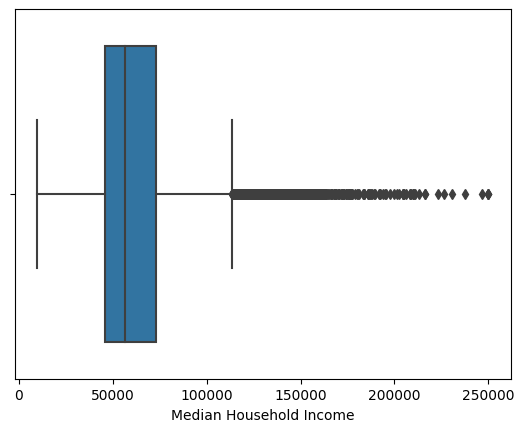

In [30]:
# Create a Boxplot through Seaborn - and rename x-axis for easier interpretation.
_ = sns.boxplot(x=question3_df['med_inc_2018']).set(xlabel='Median Household Income')

* As we can observe, there are lots of outliers presented in the above boxplot, especially with values that exceed 100000.
* We move forward and we drop all the outliers.

In [31]:
question3_df = question3_df[(question3_df.med_inc_2018 >= 30000) & (question3_df.med_inc_2018 <= 100000)]

* Let's plot again the boxplot to preview the adjustments we made above - we expect to do not have outliers.

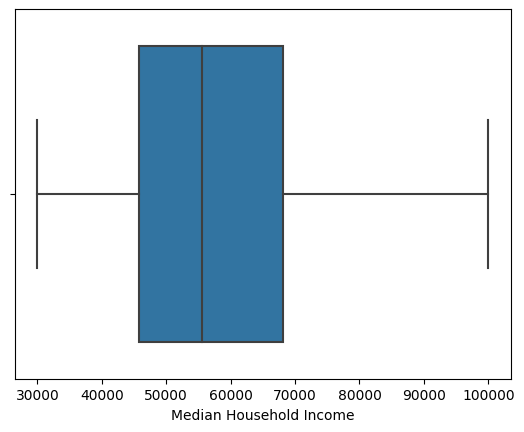

In [32]:
# Create an updated Boxplot through Seaborn - and again rename x-axis for easier interpretation.
_ = sns.boxplot(x=question3_df['med_inc_2018']).set(xlabel='Median Household Income')

* As we expected it, there are no outliers in the `med_inc_2018`'s boxplot. 

* Let's preview our dataframe once again before moving one to the plotting procedure. 

In [33]:
# Preview the dataframe.
question3_df.sample(10)

,ec_zip,kfr_pooled_pooled_p25,med_inc_2018
zip,,,
26034,0.78142,0.414874,45214.0
79504,0.83402,0.486230,47202.0
75574,0.87662,0.433749,56371.0
68047,1.20386,0.460885,63676.0
23690,0.87550,0.350478,49509.0
75147,0.83288,0.442852,44559.0
11368,0.47133,0.439823,50797.0
49254,0.81285,0.371173,48010.0
74434,0.85529,0.408065,53639.0


* From the above outputs, we can observe that the `kfr_pooled_pooled_p25` column are not in the format that the demanded figure expected to be.
* More specifically, to fix this issue we could either to multiple by 100 *(e.g. to make 0.377496 --> 37.7496)* or scale down the bins to make the assignments properly *(e.g. instead of < 38 we will assign the values to < 0.38's color)*.
* We decide to move forward with the second approach and scale down the bins.
* We will create a colunm with the assigned color according to the `kfr_pooled_pooled_p25` value.

In [34]:
# Create the bins to depicted the demanded figure (scaled down by 100).
bins = [0, 0.38, 0.41, 0.44, 0.48, 1]

colors = ["#cd0000", "#ffa500", "#ffe4c4", "#009acd", "#191970"]

question3_df["colors_categories"] = pd.cut(question3_df["kfr_pooled_pooled_p25"], bins=bins, labels=colors)

# Output the results for evaluation purposes.
print (question3_df)

        ec_zip  kfr_pooled_pooled_p25  med_inc_2018 colors_categories
zip                                                                  
1001   0.88157               0.468741       62144.0           #009acd
1002   1.18348               0.475851       55858.0           #009acd
1005   1.15543               0.407809       68278.0           #ffa500
1007   1.19240               0.476621       93300.0           #009acd
1010   0.73856               0.492584       84471.0           #191970
...        ...                    ...           ...               ...
99840  1.11489               0.485863       72237.0           #191970
99901  0.99517               0.404646       70356.0           #ffa500
99921  0.87977               0.294530       58571.0           #cd0000
99926  0.87888               0.277356       53409.0           #cd0000
99929  1.06344               0.392887       57583.0           #ffa500

[16823 rows x 4 columns]


* We can now create our scatterplot.

In [ ]:
# Set style.
sns.set_style('darkgrid')

# Define width and height of plot
# (to mach the datapoint inside the legend - between > 48 and 44 - 48).
fig = plt.figure()
fig.set_figwidth(10.5)
fig.set_figheight(6)

# Get the colors to the plot's legend.
plt.scatter([],[],color=colors[4]) 
plt.scatter([],[],color=colors[3])
plt.scatter([],[],color=colors[2])
plt.scatter([],[],color=colors[1])
plt.scatter([],[],color=colors[0])

# Create scatterplot.
scatter = plt.scatter(x = question3_df.med_inc_2018, 
                 y = question3_df.ec_zip, 
                 color = question3_df.colors_categories, 
                 alpha=0.55) 

# Parse axes' names, and legend. 
plt.xlabel('Median Household Income in ZIP Code (US$)')
plt.ylabel('Economic Correctedness')
plt.legend(['> 48','44 - 48','41 - 44','38 - 41','< 38'],
           title="Upward Mobility",loc='lower right')

# Output the plot.
plt.show()

* Finally, we create a replication of *[Figure 6 of the first paper](https://www.nature.com/articles/s41586-022-04996-4/figures/6)* that is very similar with the demanded [one](data/demanded_figures/upward_mobility_connectedness_parental_income.png) !

---
## Question 4: Friending Bias and Exposure by High School
---

In this section of the current assignement, we are asked to replicate the [Figure 5a of the second paper](https://www.nature.com/articles/s41586-022-04997-3/figures/5). 
This particular figure, presents the share of students with high parental Socioeconomic Status (SES) against the friending bias of students of low parental SES.

The datasets used for this figure can be found on the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas) website.

In [9]:
# Get the dataset's path.
path = os.path.abspath('data/social_capital_high_school.csv')

# Load the CSV to a dataframe (keeping only the necessary columns).
question4_df = pd.read_csv(path, usecols=["high_school", "high_school_name", "ec_parent_ses_hs", 
                                          "exposure_parent_ses_hs", "bias_parent_ses_hs"])

# Preview the dataframe.
# question4_df.sample(10)
question4_df.head(10)

,high_school,high_school_name,ec_parent_ses_hs,exposure_parent_ses_hs,bias_parent_ses_hs
0,00000044,Holy Spirit Catholic School,NaN,NaN,NaN
1,00000226,John Carroll Catholic HS,1.43847,1.44259,0.00285
2,00000237,Holy Family Cristo Rey Catholic HS,NaN,NaN,NaN
3,00000714,Montgomery Catholic Preparatory School,NaN,NaN,NaN
4,00000758,St Paul's Episcopal School,1.57592,1.57514,-0.00050
5,00000827,Marengo Academy HS,NaN,NaN,NaN
6,00000871,John T Morgan Academy,NaN,NaN,NaN
7,00000882,Jefferson Christian Academy,NaN,NaN,NaN
8,00000962,Glenwood School,NaN,NaN,NaN
9,00000973,Mars Hill Bible School,1.25137,1.24434,-0.00565


* After 
From the question's assignment 

In [10]:
# Divide the ec_parent_ses_hs column by 2.
question4_df.ec_parent_ses_hs = question4_df.ec_parent_ses_hs.div(2)

# Preview the dataframe.
question4_df.head(10)

,high_school,high_school_name,ec_parent_ses_hs,exposure_parent_ses_hs,bias_parent_ses_hs
0,00000044,Holy Spirit Catholic School,NaN,NaN,NaN
1,00000226,John Carroll Catholic HS,0.719235,1.44259,0.00285
2,00000237,Holy Family Cristo Rey Catholic HS,NaN,NaN,NaN
3,00000714,Montgomery Catholic Preparatory School,NaN,NaN,NaN
4,00000758,St Paul's Episcopal School,0.787960,1.57514,-0.00050
5,00000827,Marengo Academy HS,NaN,NaN,NaN
6,00000871,John T Morgan Academy,NaN,NaN,NaN
7,00000882,Jefferson Christian Academy,NaN,NaN,NaN
8,00000962,Glenwood School,NaN,NaN,NaN
9,00000973,Mars Hill Bible School,0.625685,1.24434,-0.00565


need x100 to replicate data properly.

In [11]:
question4_df.ec_parent_ses_hs = question4_df.ec_parent_ses_hs.mul(100)
question4_df.bias_parent_ses_hs = question4_df.bias_parent_ses_hs.mul(100)

# Preview the dataframe.
question4_df.head(10)

,high_school,high_school_name,ec_parent_ses_hs,exposure_parent_ses_hs,bias_parent_ses_hs
0,00000044,Holy Spirit Catholic School,NaN,NaN,NaN
1,00000226,John Carroll Catholic HS,71.9235,1.44259,0.285
2,00000237,Holy Family Cristo Rey Catholic HS,NaN,NaN,NaN
3,00000714,Montgomery Catholic Preparatory School,NaN,NaN,NaN
4,00000758,St Paul's Episcopal School,78.7960,1.57514,-0.050
5,00000827,Marengo Academy HS,NaN,NaN,NaN
6,00000871,John T Morgan Academy,NaN,NaN,NaN
7,00000882,Jefferson Christian Academy,NaN,NaN,NaN
8,00000962,Glenwood School,NaN,NaN,NaN
9,00000973,Mars Hill Bible School,62.5685,1.24434,-0.565


ok values
parsing given point from assignmenty for the highschools.

rename schools propertly

In [12]:
question4_df['high_school_name'] = question4_df['high_school_name'].replace(['Payton College Preparatory HS'], 'Walter Payton College Prep')
question4_df['high_school_name'] = question4_df['high_school_name'].replace(['Evanston Twp HS'], 'Evanston Township HS')
question4_df['high_school_name'] = question4_df['high_school_name'].replace(['Cambridge Rindge And Latin'], 'Cambridge Rindge And Latin School')
question4_df['high_school_name'] = question4_df['high_school_name'].replace(['North Hollywood Sr HS'], 'North Hollywood HS')
question4_df['high_school_name'] = question4_df['high_school_name'].replace(['John L Leflore Magnet School'], 'Leflore Magnet HS')

check

In [13]:
question4_df[question4_df['high_school_name'] == 'Walter Payton College Prep']

,high_school,high_school_name,ec_parent_ses_hs,exposure_parent_ses_hs,bias_parent_ses_hs
5294,170993003989,Walter Payton College Prep,66.246005,1.33149,0.493


In [14]:
question4_df[question4_df['high_school_name'] == 'Payton College Preparatory HS']

,high_school,high_school_name,ec_parent_ses_hs,exposure_parent_ses_hs,bias_parent_ses_hs


change ok renamed has entries the old no.

In [15]:
# define codes for schools that we add arrows. 
codes = ['00941729',     '060474000432', '170993000942', 
         '170993001185', '170993003989', '171449001804', 
         '250327000436', '360009101928', '370297001285', 
         '483702004138', '250843001336', '062271003230', 
         '010237000962', '00846981',     '00852124']

In [16]:
import adjustText 

at = { 
        'expand_points': (2, 2),
        'arrowprops': {
            'zorder': 0.5,
            'arrowstyle': '->',
            'color': '#76eec6'
        }
    }


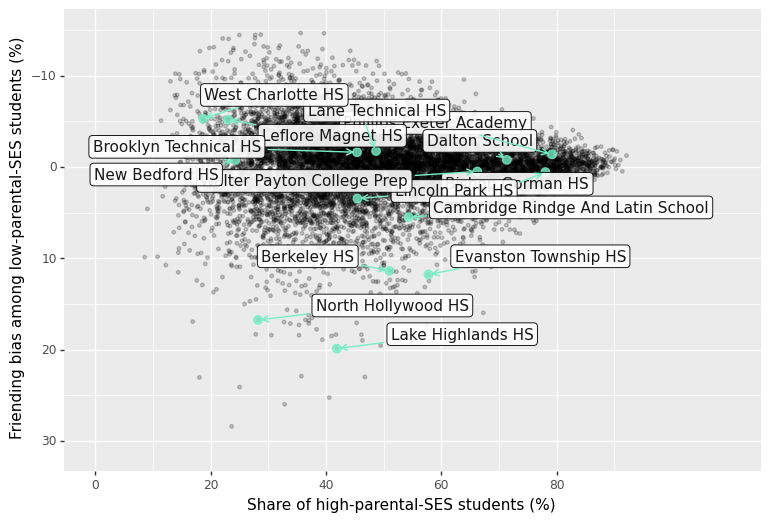

<ggplot: (143161708181)>

In [47]:
from adjustText import adjust_text
from plotnine import *

ggplot(data=question4_df) +\
             geom_point(mapping=aes(x='ec_parent_ses_hs', y='bias_parent_ses_hs'), 
             na_rm=True, size=1, alpha=0.2) +\
             scale_y_reverse() +\
             ylim(31, -15) +\
             scale_x_continuous(limits = (0,110), breaks=[0,20,40,60,80]) +\
             xlab('Share of high-parental-SES students (%)') +\
             ylab('Friending bias among low-parental-SES students (%)')  +\
             geom_point(mapping=aes(x='ec_parent_ses_hs', y='bias_parent_ses_hs'), data=question4_df[question4_df.high_school.isin(codes)], # bullets blue
             color='#76eec6',na_rm=True, size=3, alpha=0.8) +\
             geom_label(mapping=aes(x= 'ec_parent_ses_hs', y='bias_parent_ses_hs',label='high_school_name'),data=question4_df[question4_df.high_school.isin(codes)], alpha = 0.9, adjust_text=at) +\
             theme(figure_size=(9, 6)) # define figure

In [29]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


---
## Q5: Friending Bias vs. Racial Diversity
---

In the final question of this assignment we will replicate the [Extended Data Figure 3](https://www.nature.com/articles/s41586-022-04997-3/figures/9) of the second paper.

In [172]:
# Get the dataset's path.
path = os.path.abspath('data/social_capital_zip.csv')

# Load the CSV to a dataframe (keeping only the necessary columns).
question5_nbhd_first_df = pd.read_csv(path, usecols = ['zip', 'nbhd_bias_zip', 'num_below_p50'])
                           
# Preview the dataframe.
# question5_nbhd_first_df.sample(10)
question5_nbhd_first_df.head(10)

,zip,num_below_p50,nbhd_bias_zip
0,1001,995.787468,-0.00336
1,1002,1312.117077,0.18724
2,1003,NaN,NaN
3,1005,381.519745,-0.00064
4,1007,915.396667,0.04162
5,1008,90.721764,NaN
6,1010,312.542969,NaN
7,1011,104.810677,NaN
8,1013,2616.550354,0.20223
9,1020,2002.082487,0.14469


In [173]:
# Get the dataset's path.
path = os.path.abspath('data/zip_covariates.dta')

# Load the CSV to a dataframe (keeping only the necessary columns).
question5_nbhd_second_df = pd.read_stata(path, columns = ['zip','share_white_2018', 'share_black_2018',
                                                        'share_natam_2018', 'share_asian_2018',
                                                        'share_hawaii_2018','share_hispanic_2018'])
                           
# Preview the dataframe.
# question5_nbhd_second_df.sample(10)
question5_nbhd_second_df.head(10)

,zip,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018
0,36006,0.838992,0.110624,0.002191,0.000000,0.000000,0.010953
1,36067,0.713614,0.214885,0.004142,0.004978,0.000174,0.042155
2,36749,0.707317,0.292683,0.000000,0.000000,0.000000,0.000000
3,36066,0.766194,0.161858,0.003142,0.029376,0.000000,0.019165
4,36051,0.807217,0.177113,0.000000,0.000000,0.000000,0.015670
5,36003,0.445205,0.521602,0.007376,0.003161,0.000000,0.017387
6,36530,0.966278,0.003170,0.006629,0.000000,0.000000,0.020320
7,36551,0.824233,0.110754,0.014509,0.000000,0.000000,0.036217
8,36550,0.218814,0.781186,0.000000,0.000000,0.000000,0.000000
9,36507,0.718863,0.237781,0.007694,0.001810,0.000000,0.024122


In [174]:
# Get the dataset's path.
path = os.path.abspath('data/social_capital_college.csv')

# Load the CSV to a dataframe (keeping only the necessary columns).
question5_college_first_df = pd.read_csv(path, usecols = ['college', 
                                                          'bias_own_ses_college', 
                                                          'mean_students_per_cohort'])
                           
# Preview the dataframe.
# question5_college_first_df.sample(10)
question5_college_first_df.head(10)

,college,mean_students_per_cohort,bias_own_ses_college
0,100200,943.666667,-0.01200
1,100300,227.666667,-0.05807
2,100400,494.000000,-0.00504
3,100500,NaN,-0.03664
4,100700,NaN,0.05010
5,100800,NaN,-0.03763
6,100900,3839.000000,0.03599
7,101200,288.666667,-0.00799
8,101300,1604.333333,0.04682
9,101500,289.000000,0.09889


we want percentages so *100

In [175]:
# Multiple by 100 the 'bias_own_ses_college' column.
question5_college_first_df.bias_own_ses_college = question5_college_first_df.bias_own_ses_college.mul(100)

# Preview the dataframe.
# question5_college_first_df.sample(10)
question5_college_first_df.head(10)

,college,mean_students_per_cohort,bias_own_ses_college
0,100200,943.666667,-1.200
1,100300,227.666667,-5.807
2,100400,494.000000,-0.504
3,100500,NaN,-3.664
4,100700,NaN,5.010
5,100800,NaN,-3.763
6,100900,3839.000000,3.599
7,101200,288.666667,-0.799
8,101300,1604.333333,4.682
9,101500,289.000000,9.889


In [176]:
# Get the dataset's path.
path = os.path.abspath('data/college_characteristics.dta')

# Load the CSV to a dataframe (keeping only the necessary columns).
question5_college_second_df = pd.read_stata(path, columns = ['college', 
                                      'asian_or_pacific_share_fall_2000',
                                      'black_share_fall_2000', 
                                      'hisp_share_fall_2000'])
                           
# Preview the dataframe.
# question5_college_second_df.sample(10)
question5_college_second_df.head(10)

,college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000
0,161000,0.716553,0.011714,0.018803
1,470100,0.056209,0.151004,0.299666
2,120600,0.260676,0.018759,0.136386
3,998900,0.036090,0.046617,0.401504
4,3695700,0.142595,0.027094,0.386812
5,122200,0.112693,0.157164,0.443674
6,111800,0.147487,0.046005,0.274466
7,771300,0.289951,0.036047,0.193907
8,853800,0.325995,0.074363,0.224879
9,450200,0.401386,0.085995,0.159117


merge neighborhood.

In [177]:
# Merge the two neighborhood dataframes.
question5_nbhd_df = pd.merge(question5_nbhd_first_df, question5_nbhd_second_df, left_on='zip', right_on='zip')

# Preview the dataframe.
question5_nbhd_df.head(10)
# question5_nbhd_df.sample(10)

,zip,num_below_p50,nbhd_bias_zip,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018
0,1001,995.787468,-0.00336,0.883491,0.019636,0.000341,0.025140,0.000000,0.055218
1,1002,1312.117077,0.18724,0.713397,0.059469,0.001796,0.108861,0.001131,0.073372
2,1003,NaN,NaN,0.704930,0.047784,0.004627,0.162217,0.000000,0.055526
3,1005,381.519745,-0.00064,0.944700,0.023041,0.000000,0.007814,0.000000,0.012422
4,1007,915.396667,0.04162,0.933387,0.005679,0.000000,0.033140,0.000000,0.013897
5,1008,90.721764,NaN,0.971596,0.000000,0.003342,0.000000,0.000000,0.016708
6,1010,312.542969,NaN,0.926986,0.036106,0.000000,0.004547,0.000000,0.026210
7,1011,104.810677,NaN,0.980663,0.002762,0.000000,0.001381,0.000000,0.007597
8,1013,2616.550354,0.20223,0.651420,0.037286,0.000347,0.022892,0.000000,0.276436
9,1020,2002.082487,0.14469,0.766223,0.032229,0.001994,0.020268,0.000000,0.163604


In [178]:
question5_nbhd_df.isnull().sum()

zip                       0
num_below_p50            17
nbhd_bias_zip          8735
share_white_2018          1
share_black_2018          1
share_natam_2018          1
share_asian_2018          1
share_hawaii_2018         1
share_hispanic_2018       1
dtype: int64

* We will drop all missing values so that we can produce the figure properly.

In [179]:
# Drop the NAs.
question5_nbhd_df = question5_nbhd_df.dropna()

**hhi**.

In [180]:
question5_nbhd_df['nbhd_bias_zip'] = question5_nbhd_df['nbhd_bias_zip']*100

In [181]:
question5_nbhd_df['hhi'] = 1 - (question5_nbhd_df['share_white_2018'] ** 2 + 
                                question5_nbhd_df['share_black_2018'] ** 2 + 
                                question5_nbhd_df['share_natam_2018'] ** 2 + 
                                question5_nbhd_df['share_asian_2018'] ** 2 + 
                                question5_nbhd_df['share_hawaii_2018']**2 + 
                                question5_nbhd_df['share_hispanic_2018'] ** 2)

In [182]:
question5_nbhd_df['bins'] = pd.qcut(question5_nbhd_df.hhi, q=20)

question5_nbhd_df.bins

0        (0.185, 0.221]
1        (0.455, 0.491]
3        (0.103, 0.126]
4        (0.126, 0.153]
8        (0.491, 0.523]
              ...      
23012    (0.586, 0.624]
23014    (0.554, 0.586]
23015    (0.523, 0.554]
23017    (0.455, 0.491]
23018    (0.523, 0.554]
Name: bins, Length: 14284, dtype: category
Categories (20, interval[float64, right]): [(-0.001, 0.0556] < (0.0556, 0.0813] < (0.0813, 0.103] < (0.103, 0.126] ... (0.554, 0.586] < (0.586, 0.624] < (0.624, 0.67] < (0.67, 0.894]]

In [183]:
# Preview the dataframe.
question5_nbhd_df.head(10)

,zip,num_below_p50,nbhd_bias_zip,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018,hhi,bins
0,1001,995.787468,-0.336000,0.883491,0.019636,0.000341,0.025140,0.000000,0.055218,0.215376,"(0.185, 0.221]"
1,1002,1312.117077,18.724000,0.713397,0.059469,0.001796,0.108861,0.001131,0.073372,0.470289,"(0.455, 0.491]"
3,1005,381.519745,-0.064000,0.944700,0.023041,0.000000,0.007814,0.000000,0.012422,0.106795,"(0.103, 0.126]"
4,1007,915.396667,4.162000,0.933387,0.005679,0.000000,0.033140,0.000000,0.013897,0.127465,"(0.126, 0.153]"
8,1013,2616.550354,20.223001,0.651420,0.037286,0.000347,0.022892,0.000000,0.276436,0.497321,"(0.491, 0.523]"
9,1020,2002.082487,14.469001,0.766223,0.032229,0.001994,0.020268,0.000000,0.163604,0.384683,"(0.377, 0.417]"
12,1027,1205.848129,10.926000,0.893826,0.020226,0.000168,0.020899,0.000000,0.044431,0.198256,"(0.185, 0.221]"
13,1028,567.511124,8.563000,0.856975,0.045556,0.001852,0.045679,0.000000,0.037160,0.260047,"(0.258, 0.296]"
14,1030,610.159294,5.411000,0.908298,0.013306,0.000000,0.016722,0.000000,0.054302,0.171589,"(0.153, 0.185]"
16,1033,402.131439,-10.154000,0.922470,0.000000,0.000000,0.002842,0.000000,0.057161,0.145774,"(0.126, 0.153]"


In [184]:
# y mean.
bins_mean = question5_nbhd_df.groupby('bins').mean()

weighted_y_nbhd = pd.DataFrame(bins_mean, columns=['nbhd_bias_zip'])
weighted_y_nbhd.reset_index()

,bins,nbhd_bias_zip
0,"(-0.001, 0.0556]",0.549186
1,"(0.0556, 0.0813]",1.357405
2,"(0.0813, 0.103]",2.750777
3,"(0.103, 0.126]",3.831116
4,"(0.126, 0.153]",4.057195
5,"(0.153, 0.185]",5.431088
6,"(0.185, 0.221]",5.667990
7,"(0.221, 0.258]",6.812171
8,"(0.258, 0.296]",7.544436
9,"(0.296, 0.335]",8.908101


x weighted

In [185]:
bins_mean = question5_nbhd_df.groupby('bins')


weighted_x_nbhd = bins_mean.apply(lambda x: pd.Series([np.average(x['hhi'], weights=x['num_below_p50'])]))
weighted_x_nbhd.reset_index()

,bins,0
0,"(-0.001, 0.0556]",0.036806
1,"(0.0556, 0.0813]",0.070262
2,"(0.0813, 0.103]",0.091627
3,"(0.103, 0.126]",0.113485
4,"(0.126, 0.153]",0.136975
5,"(0.153, 0.185]",0.168371
6,"(0.185, 0.221]",0.202083
7,"(0.221, 0.258]",0.239561
8,"(0.258, 0.296]",0.277483
9,"(0.296, 0.335]",0.315350


merge bins x and y 

In [186]:
# Merge the two neighborhood dataframes.
question5_nbhd_weighted_df = pd.merge(weighted_x_nbhd, weighted_y_nbhd, left_on='bins', right_on='bins')

# Preview the dataframe.
question5_nbhd_weighted_df.head(10)
# question5_nbhd_weighted_df.sample(10)

,0,nbhd_bias_zip
bins,,
"(-0.001, 0.0556]",0.036806,0.549186
"(0.0556, 0.0813]",0.070262,1.357405
"(0.0813, 0.103]",0.091627,2.750777
"(0.103, 0.126]",0.113485,3.831116
"(0.126, 0.153]",0.136975,4.057195
"(0.153, 0.185]",0.168371,5.431088
"(0.185, 0.221]",0.202083,5.667990
"(0.221, 0.258]",0.239561,6.812171
"(0.258, 0.296]",0.277483,7.544436


In [187]:
question5_nbhd_weighted_df = pd.DataFrame(question5_nbhd_weighted_df)
question5_nbhd_weighted_df.columns = ['hhi', 'bias']

# Preview the dataframe.
question5_nbhd_weighted_df.head(10)
# question5_nbhd_weighted_df.sample(10)

,hhi,bias
bins,,
"(-0.001, 0.0556]",0.036806,0.549186
"(0.0556, 0.0813]",0.070262,1.357405
"(0.0813, 0.103]",0.091627,2.750777
"(0.103, 0.126]",0.113485,3.831116
"(0.126, 0.153]",0.136975,4.057195
"(0.153, 0.185]",0.168371,5.431088
"(0.185, 0.221]",0.202083,5.667990
"(0.221, 0.258]",0.239561,6.812171
"(0.258, 0.296]",0.277483,7.544436


In [188]:
# Add 'plot_type' column to the dataframe, 
# with 'Neighborhood' type for all entries.
question5_nbhd_weighted_df['plot_type'] = 'Neighborhood '


# Preview the dataframe.
question5_nbhd_weighted_df.head(10)
# question5_nbhd_weighted_df.sample(10)

,hhi,bias,plot_type
bins,,,
"(-0.001, 0.0556]",0.036806,0.549186,Neighborhood
"(0.0556, 0.0813]",0.070262,1.357405,Neighborhood
"(0.0813, 0.103]",0.091627,2.750777,Neighborhood
"(0.103, 0.126]",0.113485,3.831116,Neighborhood
"(0.126, 0.153]",0.136975,4.057195,Neighborhood
"(0.153, 0.185]",0.168371,5.431088,Neighborhood
"(0.185, 0.221]",0.202083,5.667990,Neighborhood
"(0.221, 0.258]",0.239561,6.812171,Neighborhood
"(0.258, 0.296]",0.277483,7.544436,Neighborhood


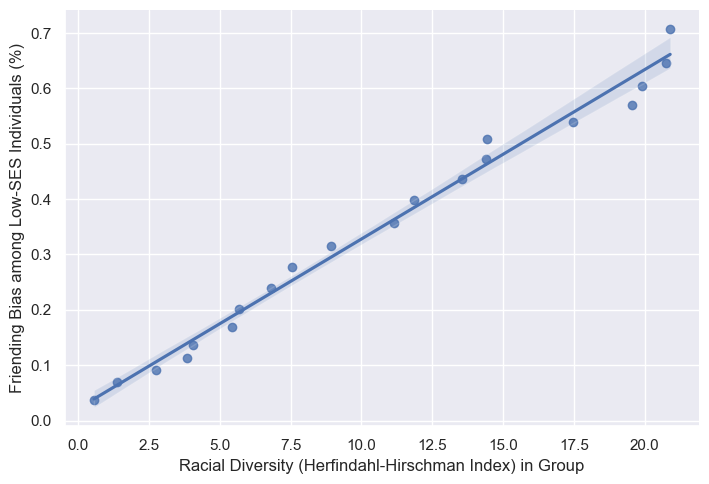

In [189]:
# Set style.
sns.set_style('darkgrid')

plot = sns.lmplot(x = "bias", y = "hhi", data = question5_nbhd_weighted_df, aspect = 1.45)
 

plot.set(xlabel='Racial Diversity (Herfindahl-Hirschman Index) in Group', 
         ylabel='Friending Bias among Low-SES Individuals (%)')

# plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

plt.show()

college now. same procedure for college

In [190]:
# Merge the two college dataframes.
question5_college_df = pd.merge(question5_college_first_df, question5_college_second_df, left_on='college', right_on='college')

# Preview the dataframe.
question5_college_df.head(10)
# question5_college_df.sample(10)

,college,mean_students_per_cohort,bias_own_ses_college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000
0,100200,943.666667,-1.200,0.002968,0.905479,0.002740
1,100300,227.666667,-5.807,0.002942,0.383354,0.005885
2,100400,494.000000,-0.504,0.005084,0.139226,0.007039
3,100500,NaN,-3.664,0.001840,0.917203,0.002760
4,100700,NaN,5.010,0.003805,0.207990,0.004439
5,100900,3839.000000,3.599,0.011568,0.069410,0.008294
6,101200,288.666667,-0.799,0.035842,0.103943,0.005018
7,101300,1604.333333,4.682,0.019562,0.184998,0.013473
8,101500,289.000000,9.889,0.028931,0.189937,0.033333
9,101600,806.000000,-1.022,0.005663,0.100324,0.006472


In [191]:
# Check for NAs.
question5_college_df.isnull().sum()

college                               0
mean_students_per_cohort            133
bias_own_ses_college                 39
asian_or_pacific_share_fall_2000     22
black_share_fall_2000                22
hisp_share_fall_2000                 22
dtype: int64

In [192]:
# Drop the NAs.
question5_college_df = question5_college_df.dropna()

calc white share as the remaining portions

In [193]:
black_proportion = question5_college_df['black_share_fall_2000']
hispanic_proportion = question5_college_df['hisp_share_fall_2000']
asian_or_pacific_proportion = question5_college_df['asian_or_pacific_share_fall_2000']

# Calculate white proportion.
white_proportion = 1 - black_proportion - hispanic_proportion - asian_or_pacific_proportion

In [194]:
# Calculate the HHI for the colleges.
question5_college_df['hhi'] = 1 - ((white_proportion **2) + 
                                   (black_proportion**2) + 
                                   (asian_or_pacific_proportion**2) + 
                                   (hispanic_proportion**2))


# Preview the dataframe.
question5_college_df.head(10)

,college,mean_students_per_cohort,bias_own_ses_college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000,hhi
0,100200,943.666667,-1.200,0.002968,0.905479,0.002740,0.172203
1,100300,227.666667,-5.807,0.002942,0.383354,0.005885,0.483553
2,100400,494.000000,-0.504,0.005084,0.139226,0.007039,0.260333
5,100900,3839.000000,3.599,0.011568,0.069410,0.008294,0.165554
6,101200,288.666667,-0.799,0.035842,0.103943,0.005018,0.256524
7,101300,1604.333333,4.682,0.019562,0.184998,0.013473,0.353740
8,101500,289.000000,9.889,0.028931,0.189937,0.033333,0.402773
9,101600,806.000000,-1.022,0.005663,0.100324,0.006472,0.202133
10,101700,819.333333,1.900,0.003760,0.174640,0.007938,0.307378
11,101800,655.000000,10.145,0.010244,0.253876,0.010797,0.409580


In [195]:
question5_college_df['bins'] = pd.qcut(question5_college_df.hhi, q=20)

question5_college_df.bins

0        (0.17, 0.193]
1       (0.456, 0.494]
2       (0.244, 0.273]
5         (0.15, 0.17]
6       (0.244, 0.273]
             ...      
2219    (0.542, 0.618]
2226    (0.494, 0.542]
2227     (0.17, 0.193]
2228    (0.618, 0.739]
2229    (0.618, 0.739]
Name: bins, Length: 2056, dtype: category
Categories (20, interval[float64, right]): [(0.00385, 0.0486] < (0.0486, 0.0761] < (0.0761, 0.0954] < (0.0954, 0.116] ... (0.456, 0.494] < (0.494, 0.542] < (0.542, 0.618] < (0.618, 0.739]]

In [196]:
# Preview the dataframe.
question5_college_df.head(10)

,college,mean_students_per_cohort,bias_own_ses_college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000,hhi,bins
0,100200,943.666667,-1.200,0.002968,0.905479,0.002740,0.172203,"(0.17, 0.193]"
1,100300,227.666667,-5.807,0.002942,0.383354,0.005885,0.483553,"(0.456, 0.494]"
2,100400,494.000000,-0.504,0.005084,0.139226,0.007039,0.260333,"(0.244, 0.273]"
5,100900,3839.000000,3.599,0.011568,0.069410,0.008294,0.165554,"(0.15, 0.17]"
6,101200,288.666667,-0.799,0.035842,0.103943,0.005018,0.256524,"(0.244, 0.273]"
7,101300,1604.333333,4.682,0.019562,0.184998,0.013473,0.353740,"(0.337, 0.378]"
8,101500,289.000000,9.889,0.028931,0.189937,0.033333,0.402773,"(0.378, 0.413]"
9,101600,806.000000,-1.022,0.005663,0.100324,0.006472,0.202133,"(0.193, 0.217]"
10,101700,819.333333,1.900,0.003760,0.174640,0.007938,0.307378,"(0.301, 0.337]"
11,101800,655.000000,10.145,0.010244,0.253876,0.010797,0.409580,"(0.378, 0.413]"


find the weighter means for college.

In [197]:
# y mean.
bins_mean = question5_college_df.groupby('bins').mean()

weighted_y_college = pd.DataFrame(bins_mean, columns=['bias_own_ses_college'])
weighted_y_college.reset_index()

,bins,bias_own_ses_college
0,"(0.00385, 0.0486]",-1.940427
1,"(0.0486, 0.0761]",-1.387583
2,"(0.0761, 0.0954]",-1.564301
3,"(0.0954, 0.116]",-1.033039
4,"(0.116, 0.13]",1.002353
5,"(0.13, 0.15]",-1.326806
6,"(0.15, 0.17]",-0.043913
7,"(0.17, 0.193]",-0.189495
8,"(0.193, 0.217]",0.249441
9,"(0.217, 0.244]",0.325816


In [198]:
bins_mean = question5_college_df.groupby('bins')


weighted_x_college = bins_mean.apply(lambda x: pd.Series([np.average(x['hhi'], weights=x['mean_students_per_cohort'])]))
weighted_x_college.reset_index()

,bins,0
0,"(0.00385, 0.0486]",0.036351
1,"(0.0486, 0.0761]",0.063832
2,"(0.0761, 0.0954]",0.086561
3,"(0.0954, 0.116]",0.104939
4,"(0.116, 0.13]",0.126086
5,"(0.13, 0.15]",0.139918
6,"(0.15, 0.17]",0.158967
7,"(0.17, 0.193]",0.182248
8,"(0.193, 0.217]",0.208110
9,"(0.217, 0.244]",0.229371


In [205]:
# Merge the two neighborhood dataframes.
question5_college_weighted_df = pd.merge(weighted_x_college, weighted_y_college, left_on='bins', right_on='bins')

# Preview the dataframe.
question5_college_weighted_df.head(10)
# question5_college_weighted_df.sample(10)

,0,bias_own_ses_college
bins,,
"(0.00385, 0.0486]",0.036351,-1.940427
"(0.0486, 0.0761]",0.063832,-1.387583
"(0.0761, 0.0954]",0.086561,-1.564301
"(0.0954, 0.116]",0.104939,-1.033039
"(0.116, 0.13]",0.126086,1.002353
"(0.13, 0.15]",0.139918,-1.326806
"(0.15, 0.17]",0.158967,-0.043913
"(0.17, 0.193]",0.182248,-0.189495
"(0.193, 0.217]",0.208110,0.249441


In [206]:
question5_college_weighted_df = pd.DataFrame(question5_college_weighted_df)
question5_college_weighted_df.columns = ['hhi', 'bias']

# Preview the dataframe.
question5_college_weighted_df.head(10)
# question5_college_weighted_df.sample(10)

,hhi,bias
bins,,
"(0.00385, 0.0486]",0.036351,-1.940427
"(0.0486, 0.0761]",0.063832,-1.387583
"(0.0761, 0.0954]",0.086561,-1.564301
"(0.0954, 0.116]",0.104939,-1.033039
"(0.116, 0.13]",0.126086,1.002353
"(0.13, 0.15]",0.139918,-1.326806
"(0.15, 0.17]",0.158967,-0.043913
"(0.17, 0.193]",0.182248,-0.189495
"(0.193, 0.217]",0.208110,0.249441


In [207]:
# Add 'plot_type' column to the dataframe, 
# with 'Neighborhood' type for all entries.
question5_college_weighted_df['plot_type'] = 'College '


# Preview the dataframe.
question5_college_weighted_df.head(10)
# question5_college_weighted_df.sample(10)

,hhi,bias,plot_type
bins,,,
"(0.00385, 0.0486]",0.036351,-1.940427,College
"(0.0486, 0.0761]",0.063832,-1.387583,College
"(0.0761, 0.0954]",0.086561,-1.564301,College
"(0.0954, 0.116]",0.104939,-1.033039,College
"(0.116, 0.13]",0.126086,1.002353,College
"(0.13, 0.15]",0.139918,-1.326806,College
"(0.15, 0.17]",0.158967,-0.043913,College
"(0.17, 0.193]",0.182248,-0.189495,College
"(0.193, 0.217]",0.208110,0.249441,College


now merge all to 1

In [233]:
# Merge the two dataframes, to create teh final one.
question5_df = pd.merge(question5_college_weighted_df, question5_nbhd_weighted_df, how = 'outer')

# Preview the dataframe.
# question5_df.head(10)
question5_df.sample(10)

,hhi,bias,plot_type
5,0.139918,-1.326806,College
33,0.473006,14.410357,Neighborhood
20,0.036806,0.549186,Neighborhood
36,0.569459,19.556109,Neighborhood
27,0.239561,6.812171,Neighborhood
35,0.538749,17.475266,Neighborhood
10,0.254573,1.042029,College
28,0.277483,7.544436,Neighborhood
3,0.104939,-1.033039,College
24,0.136975,4.057195,Neighborhood


plot

TypeError: 'method' object is not iterable

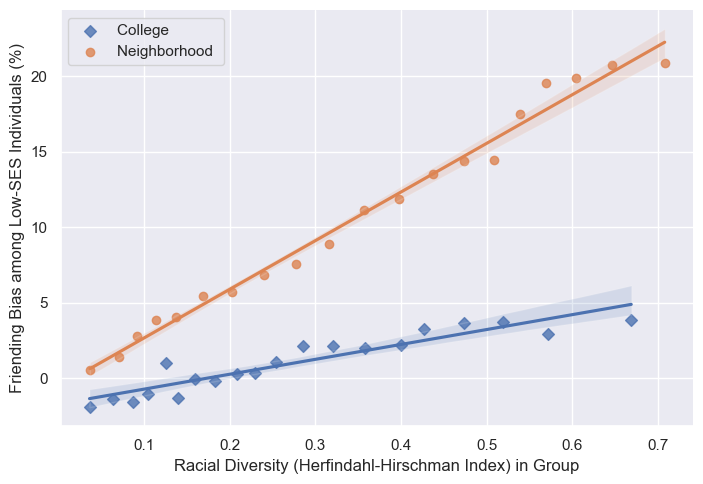

In [247]:
# Set style.
sns.set_style('darkgrid')

plot = sns.lmplot(x = "hhi", y = "bias",  hue= 'plot_type', data = question5_df,
                  aspect = 1.45, fit_reg = True,markers=['D', 'o'])

plot.set(xlabel='Racial Diversity (Herfindahl-Hirschman Index) in Group', 
         ylabel='Friending Bias among Low-SES Individuals (%)')


plt.legend(loc='upper left')
plot.legend.remove()

# plot.set_xticks(range(0,0.7)) # <--- set the ticks first
# plot.set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
# # plot.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])

# plt.scatter(x,y)
# plt.xticks(np.arange(min(question5_df.hhi.min), max(question5_df.hhi)+1, 1))

# Output the plot.
plt.show()